# Project: Holiday weather in Mississauga 2022

by Danial Arif Rauf, September 20, updated September 23 2023

In this project, I will be using 2022 weather data for Mississauga, Ontario to analyze annual weather patterns. My goal is to find warmer months, which would help with predicting warmer days for vacation next year. The weather will likely vary a little at that time but this analysis will provide an understanding of Mississauga's weather patterns throughout the year.

# Getting the data

The data used in this project is publically available at www.visualcrossing.com in '.csv' format. I will be importing Pandas to create a dataframe, clean the data, and use graphs to provide a visually appealing and user-friendly look at the data.

In [1]:
# importing Pandas and datetime module
from pandas import * 
from datetime import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
 # reading the csv file
sauga2022 = read_csv('mississauga 2022-01-01 to 2022-12-31 - Copy.csv', skipinitialspace=True)

In [3]:
 # initial look at the data
sauga2022

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,mississauga,2022-01-01,4.6,-1.6,2.8,2.6,-8.0,-1.3,1.3,90.3,...,0.8,0,NaN,2022-01-01T07:52:03,2022-01-01T16:52:40,0.96,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,snow,"71297099999,71624099999,71508099999,CXHM,71265..."
1,mississauga,2022-01-02,-2.0,-10.3,-6.0,-7.3,-16.6,-12.7,-9.9,74.2,...,1.2,1,NaN,2022-01-02T07:52:05,2022-01-02T16:53:34,0.00,"Snow, Partially cloudy",Partly cloudy throughout the day with a chance...,snow,"71297099999,71624099999,71508099999,CXHM,71265..."
2,mississauga,2022-01-03,-6.0,-13.9,-9.6,-8.0,-20.6,-14.0,-15.4,63.1,...,1.5,1,NaN,2022-01-03T07:52:05,2022-01-03T16:54:30,0.03,Partially cloudy,Partly cloudy throughout the day.,snow,"71297099999,71624099999,71508099999,CXHM,71265..."
3,mississauga,2022-01-04,2.2,-6.4,-1.9,0.8,-11.4,-6.1,-6.9,69.3,...,1.8,1,NaN,2022-01-04T07:52:02,2022-01-04T16:55:28,0.06,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"71297099999,71624099999,71508099999,CXHM,71265..."
4,mississauga,2022-01-05,4.4,-3.9,1.8,0.0,-11.7,-3.3,-2.7,72.4,...,1.0,1,NaN,2022-01-05T07:51:57,2022-01-05T16:56:27,0.10,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...,rain,"71297099999,71624099999,71432099999,7150809999..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,mississauga,2022-12-27,-1.2,-6.5,-3.9,-6.4,-14.0,-9.9,-8.6,70.3,...,2.0,1,10.0,2022-12-27T07:51:10,2022-12-27T16:48:26,0.15,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"71297099999,71624099999,71508099999,CXHM,71265..."
361,mississauga,2022-12-28,4.8,-1.2,2.1,1.6,-6.2,-2.0,-2.5,72.1,...,2.1,1,10.0,2022-12-28T07:51:25,2022-12-28T16:49:10,0.18,"Snow, Freezing Drizzle/Freezing Rain, Partiall...",Partly cloudy throughout the day with early mo...,snow,"71297099999,71624099999,71508099999,CXHM,AV116..."
362,mississauga,2022-12-29,8.9,3.0,6.4,7.6,0.7,4.0,1.9,73.5,...,2.1,1,10.0,2022-12-29T07:51:38,2022-12-29T16:49:57,0.25,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"71297099999,71624099999,71508099999,CXHM,71265..."
363,mississauga,2022-12-30,12.0,8.8,10.3,12.0,7.0,9.8,8.1,86.4,...,1.2,1,10.0,2022-12-30T07:51:49,2022-12-30T16:50:45,0.25,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"71297099999,71624099999,71508099999,CXHM,E5954..."


# Cleaning the data

In [4]:
# current columns and object types
sauga2022.dtypes

name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

In [5]:
# converting 'datetime' column into 'date time' object type
sauga2022['datetime'] = to_datetime(sauga2022['datetime'])

In [6]:
 # setting dataframe's index as the 'datetime' column
sauga2022.index = sauga2022['datetime']

In [7]:
# checking for null values per column
sauga2022.isnull().sum()

name                  0
datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype          110
snow                  0
snowdepth             0
windgust              5
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
severerisk            9
sunrise               0
sunset                0
moonphase             0
conditions            0
description           0
icon                  0
stations              0
dtype: int64

In [8]:
# replacing null values with a space ' '
sauga2022.fillna(' ', inplace=True)

In [9]:
 # renaming 'name' column to 'City' column
sauga2022 = sauga2022.rename(columns={'name' : 'City'})

In [10]:
# applying 'camel case' to all column headers
sauga2022.columns = sauga2022.columns.str.title() 
# 'camel case' to all values under 'City' to capitalize 'Mississauga'
sauga2022['City'] = sauga2022['City'].str.title() 

In [11]:
sauga2022

,City,Datetime,Tempmax,Tempmin,Temp,Feelslikemax,Feelslikemin,Feelslike,Dew,Humidity,...,Solarenergy,Uvindex,Severerisk,Sunrise,Sunset,Moonphase,Conditions,Description,Icon,Stations
datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-01,Mississauga,2022-01-01,4.6,-1.6,2.8,2.6,-8.0,-1.3,1.3,90.3,...,0.8,0,,2022-01-01T07:52:03,2022-01-01T16:52:40,0.96,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,snow,"71297099999,71624099999,71508099999,CXHM,71265..."
2022-01-02,Mississauga,2022-01-02,-2.0,-10.3,-6.0,-7.3,-16.6,-12.7,-9.9,74.2,...,1.2,1,,2022-01-02T07:52:05,2022-01-02T16:53:34,0.00,"Snow, Partially cloudy",Partly cloudy throughout the day with a chance...,snow,"71297099999,71624099999,71508099999,CXHM,71265..."
2022-01-03,Mississauga,2022-01-03,-6.0,-13.9,-9.6,-8.0,-20.6,-14.0,-15.4,63.1,...,1.5,1,,2022-01-03T07:52:05,2022-01-03T16:54:30,0.03,Partially cloudy,Partly cloudy throughout the day.,snow,"71297099999,71624099999,71508099999,CXHM,71265..."
2022-01-04,Mississauga,2022-01-04,2.2,-6.4,-1.9,0.8,-11.4,-6.1,-6.9,69.3,...,1.8,1,,2022-01-04T07:52:02,2022-01-04T16:55:28,0.06,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"71297099999,71624099999,71508099999,CXHM,71265..."
2022-01-05,Mississauga,2022-01-05,4.4,-3.9,1.8,0.0,-11.7,-3.3,-2.7,72.4,...,1.0,1,,2022-01-05T07:51:57,2022-01-05T16:56:27,0.10,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...,rain,"71297099999,71624099999,71432099999,7150809999..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,Mississauga,2022-12-27,-1.2,-6.5,-3.9,-6.4,-14.0,-9.9,-8.6,70.3,...,2.0,1,10.0,2022-12-27T07:51:10,2022-12-27T16:48:26,0.15,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"71297099999,71624099999,71508099999,CXHM,71265..."
2022-12-28,Mississauga,2022-12-28,4.8,-1.2,2.1,1.6,-6.2,-2.0,-2.5,72.1,...,2.1,1,10.0,2022-12-28T07:51:25,2022-12-28T16:49:10,0.18,"Snow, Freezing Drizzle/Freezing Rain, Partiall...",Partly cloudy throughout the day with early mo...,snow,"71297099999,71624099999,71508099999,CXHM,AV116..."
2022-12-29,Mississauga,2022-12-29,8.9,3.0,6.4,7.6,0.7,4.0,1.9,73.5,...,2.1,1,10.0,2022-12-29T07:51:38,2022-12-29T16:49:57,0.25,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"71297099999,71624099999,71508099999,CXHM,71265..."


In [12]:
# narrowing down annual data to warmer months
summer2022 = sauga2022[(sauga2022['Datetime'] >= datetime(2022, 6, 1)) & (sauga2022['Datetime'] <= datetime(2022, 9, 30))]
summer2022 

,City,Datetime,Tempmax,Tempmin,Temp,Feelslikemax,Feelslikemin,Feelslike,Dew,Humidity,...,Solarenergy,Uvindex,Severerisk,Sunrise,Sunset,Moonphase,Conditions,Description,Icon,Stations
datetime,,,,,,,,,,,,,,,,,,,,,
2022-06-01,Mississauga,2022-06-01,24.9,17.5,21.6,24.9,17.5,21.6,16.2,71.8,...,6.9,4,30.0,2022-06-01T05:40:15,2022-06-01T20:53:10,0.07,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"71297099999,71624099999,71508099999,CXHM,71171..."
2022-06-02,Mississauga,2022-06-02,20.5,10.8,16.2,20.5,10.8,16.2,6.4,53.4,...,13.2,7,10.0,2022-06-02T05:39:46,2022-06-02T20:53:57,0.11,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"71297099999,71624099999,71508099999,CXHM,71265..."
2022-06-03,Mississauga,2022-06-03,23.4,9.6,17.1,23.4,7.9,16.9,7.9,57.6,...,17.5,10,10.0,2022-06-03T05:39:19,2022-06-03T20:54:42,0.14,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"71297099999,71624099999,71508099999,CXHM,71171..."
2022-06-04,Mississauga,2022-06-04,21.0,8.4,15.7,21.0,6.5,15.4,1.4,40.2,...,18.7,10,10.0,2022-06-04T05:38:54,2022-06-04T20:55:26,0.17,Clear,Clear conditions throughout the day.,clear-day,"71297099999,71624099999,CXVN,71508099999,CXHM,..."
2022-06-05,Mississauga,2022-06-05,23.5,11.3,17.4,23.5,11.3,17.4,3.5,41.0,...,16.6,9,10.0,2022-06-05T05:38:31,2022-06-05T20:56:09,0.21,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,"71297099999,71624099999,71508099999,CXHM,71265..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,Mississauga,2022-09-26,16.3,11.0,13.4,16.3,11.0,13.4,10.6,83.8,...,4.4,3,10.0,2022-09-26T07:10:22,2022-09-26T19:08:41,0.03,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"71297099999,71624099999,71508099999,CXHM,E5954..."
2022-09-27,Mississauga,2022-09-27,16.0,11.7,13.5,16.0,11.7,13.5,11.0,85.7,...,3.4,2,10.0,2022-09-27T07:11:30,2022-09-27T19:06:52,0.06,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"71297099999,71624099999,CXVN,71508099999,CXHM,..."
2022-09-28,Mississauga,2022-09-28,13.4,11.1,12.1,13.4,11.1,12.1,8.7,80.1,...,4.1,2,10.0,2022-09-28T07:12:39,2022-09-28T19:05:02,0.10,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"71297099999,71624099999,71508099999,CXHM,E5954..."


In [13]:
# adding a new column "Tempmean", to show the 'mean average' of the max and min temperatures from the summer date range
summer2022 = summer2022.assign(Tempmean = ((summer2022['Tempmax'] + summer2022['Tempmin']) / 2)) 

# moving column from end of dataframe to the 4th index value; next to 'Tempmin' column
Tempmean = summer2022.pop("Tempmean")
summer2022.insert(4, "Tempmean", Tempmean)

# rounding 'Tempmean' column to 1 decimal places to match other numerical values in dataframe
summer2022['Tempmean'] = summer2022['Tempmean'].round(1)
summer2022

,City,Datetime,Tempmax,Tempmin,Tempmean,Temp,Feelslikemax,Feelslikemin,Feelslike,Dew,...,Solarenergy,Uvindex,Severerisk,Sunrise,Sunset,Moonphase,Conditions,Description,Icon,Stations
datetime,,,,,,,,,,,,,,,,,,,,,
2022-06-01,Mississauga,2022-06-01,24.9,17.5,21.2,21.6,24.9,17.5,21.6,16.2,...,6.9,4,30.0,2022-06-01T05:40:15,2022-06-01T20:53:10,0.07,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"71297099999,71624099999,71508099999,CXHM,71171..."
2022-06-02,Mississauga,2022-06-02,20.5,10.8,15.6,16.2,20.5,10.8,16.2,6.4,...,13.2,7,10.0,2022-06-02T05:39:46,2022-06-02T20:53:57,0.11,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"71297099999,71624099999,71508099999,CXHM,71265..."
2022-06-03,Mississauga,2022-06-03,23.4,9.6,16.5,17.1,23.4,7.9,16.9,7.9,...,17.5,10,10.0,2022-06-03T05:39:19,2022-06-03T20:54:42,0.14,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"71297099999,71624099999,71508099999,CXHM,71171..."
2022-06-04,Mississauga,2022-06-04,21.0,8.4,14.7,15.7,21.0,6.5,15.4,1.4,...,18.7,10,10.0,2022-06-04T05:38:54,2022-06-04T20:55:26,0.17,Clear,Clear conditions throughout the day.,clear-day,"71297099999,71624099999,CXVN,71508099999,CXHM,..."
2022-06-05,Mississauga,2022-06-05,23.5,11.3,17.4,17.4,23.5,11.3,17.4,3.5,...,16.6,9,10.0,2022-06-05T05:38:31,2022-06-05T20:56:09,0.21,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,"71297099999,71624099999,71508099999,CXHM,71265..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,Mississauga,2022-09-26,16.3,11.0,13.6,13.4,16.3,11.0,13.4,10.6,...,4.4,3,10.0,2022-09-26T07:10:22,2022-09-26T19:08:41,0.03,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"71297099999,71624099999,71508099999,CXHM,E5954..."
2022-09-27,Mississauga,2022-09-27,16.0,11.7,13.8,13.5,16.0,11.7,13.5,11.0,...,3.4,2,10.0,2022-09-27T07:11:30,2022-09-27T19:06:52,0.06,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"71297099999,71624099999,CXVN,71508099999,CXHM,..."
2022-09-28,Mississauga,2022-09-28,13.4,11.1,12.2,12.1,13.4,11.1,12.1,8.7,...,4.1,2,10.0,2022-09-28T07:12:39,2022-09-28T19:05:02,0.10,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"71297099999,71624099999,71508099999,CXHM,E5954..."


In [14]:
# showing days with an average temperature of <= 25 degrees celsius
summer2022[(summer2022['Tempmean'] >= 25)]

,City,Datetime,Tempmax,Tempmin,Tempmean,Temp,Feelslikemax,Feelslikemin,Feelslike,Dew,...,Solarenergy,Uvindex,Severerisk,Sunrise,Sunset,Moonphase,Conditions,Description,Icon,Stations
datetime,,,,,,,,,,,,,,,,,,,,,
2022-06-16,Mississauga,2022-06-16,31.9,18.6,25.2,25.6,33.7,18.6,26.1,16.7,...,11.7,7,100.0,2022-06-16T05:36:47,2022-06-16T21:02:05,0.57,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"71297099999,71624099999,71508099999,CXHM,71171..."
2022-06-22,Mississauga,2022-06-22,34.8,22.0,28.4,27.4,36.8,22.0,28.0,17.2,...,14.8,9,100.0,2022-06-22T05:37:41,2022-06-22T21:03:40,0.78,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"71297099999,71624099999,71508099999,CXHM,E5954..."
2022-07-19,Mississauga,2022-07-19,33.8,20.2,27.0,27.0,35.3,20.2,27.9,18.1,...,15.2,9,60.0,2022-07-19T05:54:49,2022-07-19T20:54:33,0.70,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"71297099999,71624099999,71508099999,CXHM,71171..."
2022-07-20,Mississauga,2022-07-20,30.7,24.1,27.4,27.7,32.8,24.1,28.8,19.9,...,10.8,6,60.0,2022-07-20T05:55:46,2022-07-20T20:53:43,0.75,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"71297099999,71624099999,CXVN,71432099999,71508..."
2022-07-21,Mississauga,2022-07-21,30.5,21.9,26.2,26.1,30.5,21.9,26.1,17.8,...,14.1,9,30.0,2022-07-21T05:56:43,2022-07-21T20:52:51,0.76,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"71624099999,CXHM,CWWZ,71263099999,E5954,CXTO,7..."
2022-07-22,Mississauga,2022-07-22,30.3,19.7,25.0,25.7,29.9,19.7,25.7,15.3,...,15.8,9,60.0,2022-07-22T05:57:41,2022-07-22T20:51:56,0.80,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"71297099999,71624099999,71508099999,CXHM,71171..."
2022-07-23,Mississauga,2022-07-23,31.0,22.0,26.5,26.3,32.2,22.0,26.9,17.9,...,14.4,9,75.0,2022-07-23T05:58:40,2022-07-23T20:51:01,0.83,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"71297099999,71624099999,71508099999,CXHM,71171..."
2022-07-24,Mississauga,2022-07-24,28.8,21.1,25.0,24.1,30.8,21.1,24.5,19.6,...,4.4,2,60.0,2022-07-24T05:59:39,2022-07-24T20:50:03,0.86,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"71297099999,71624099999,71508099999,CXHM,AV116..."
2022-08-06,Mississauga,2022-08-06,30.2,21.2,25.7,26.1,33.3,21.2,27.4,20.7,...,14.7,9,60.0,2022-08-06T06:13:21,2022-08-06T20:34:55,0.31,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"71297099999,71624099999,71508099999,CXHM,71171..."


In [15]:
%matplotlib inline

<Axes: xlabel='datetime'>

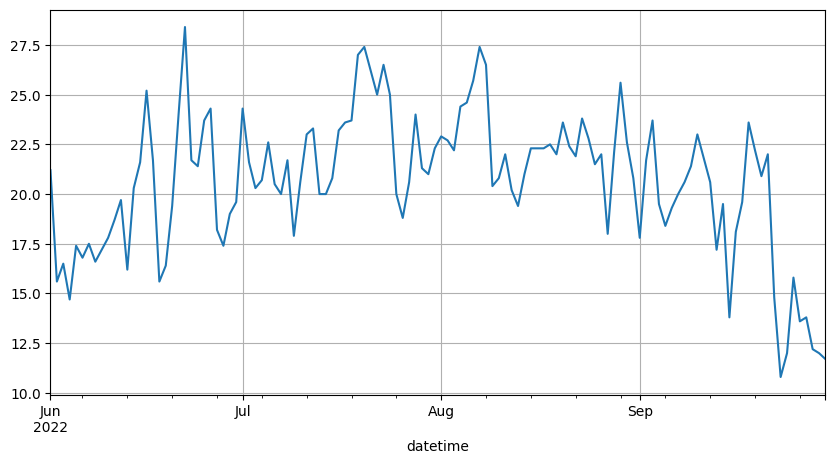

In [16]:
# viewing days as a graph
summer2022['Tempmean'].plot(grid=True, figsize=(10, 5))

<Axes: xlabel='datetime'>

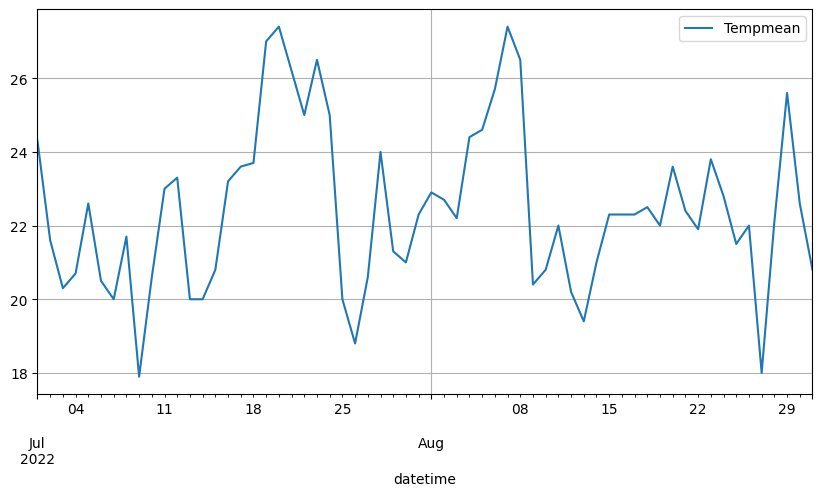

In [17]:
# Creating new variable with just the data from July and August
julyaugust = summer2022.loc[datetime(2022, 7, 1) : datetime(2022, 8, 31)]
julyaugust[['Tempmean']].plot(grid=True, figsize=(10, 5))

# Conclusion

After cleaning the annual weather data and viewing the analysis as graphs, we can see variability in the weather througout the year. This analysis helped me conclude July and August to be warmer months ideal for time off.